# Multiple Regression..........

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("diabetes_dataset.csv")

In [3]:
dataset.head(4)

,PatientID,Age,Gender,BMI,BloodPressure,Insulin,Glucose,DiabetesPedigreeFunction,Outcome
0,1,52,0,30.239636,149,113,115,0.312886,1
1,2,53,1,30.932781,71,39,104,0.389526,0
2,3,21,0,45.092714,161,67,151,1.205869,0
3,4,39,0,47.795530,101,165,184,0.595201,1


In [4]:
dataset.shape

(100, 9)

In [5]:
dataset.isnull().sum()

PatientID                   0
Age                         0
Gender                      0
BMI                         0
BloodPressure               0
Insulin                     0
Glucose                     0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

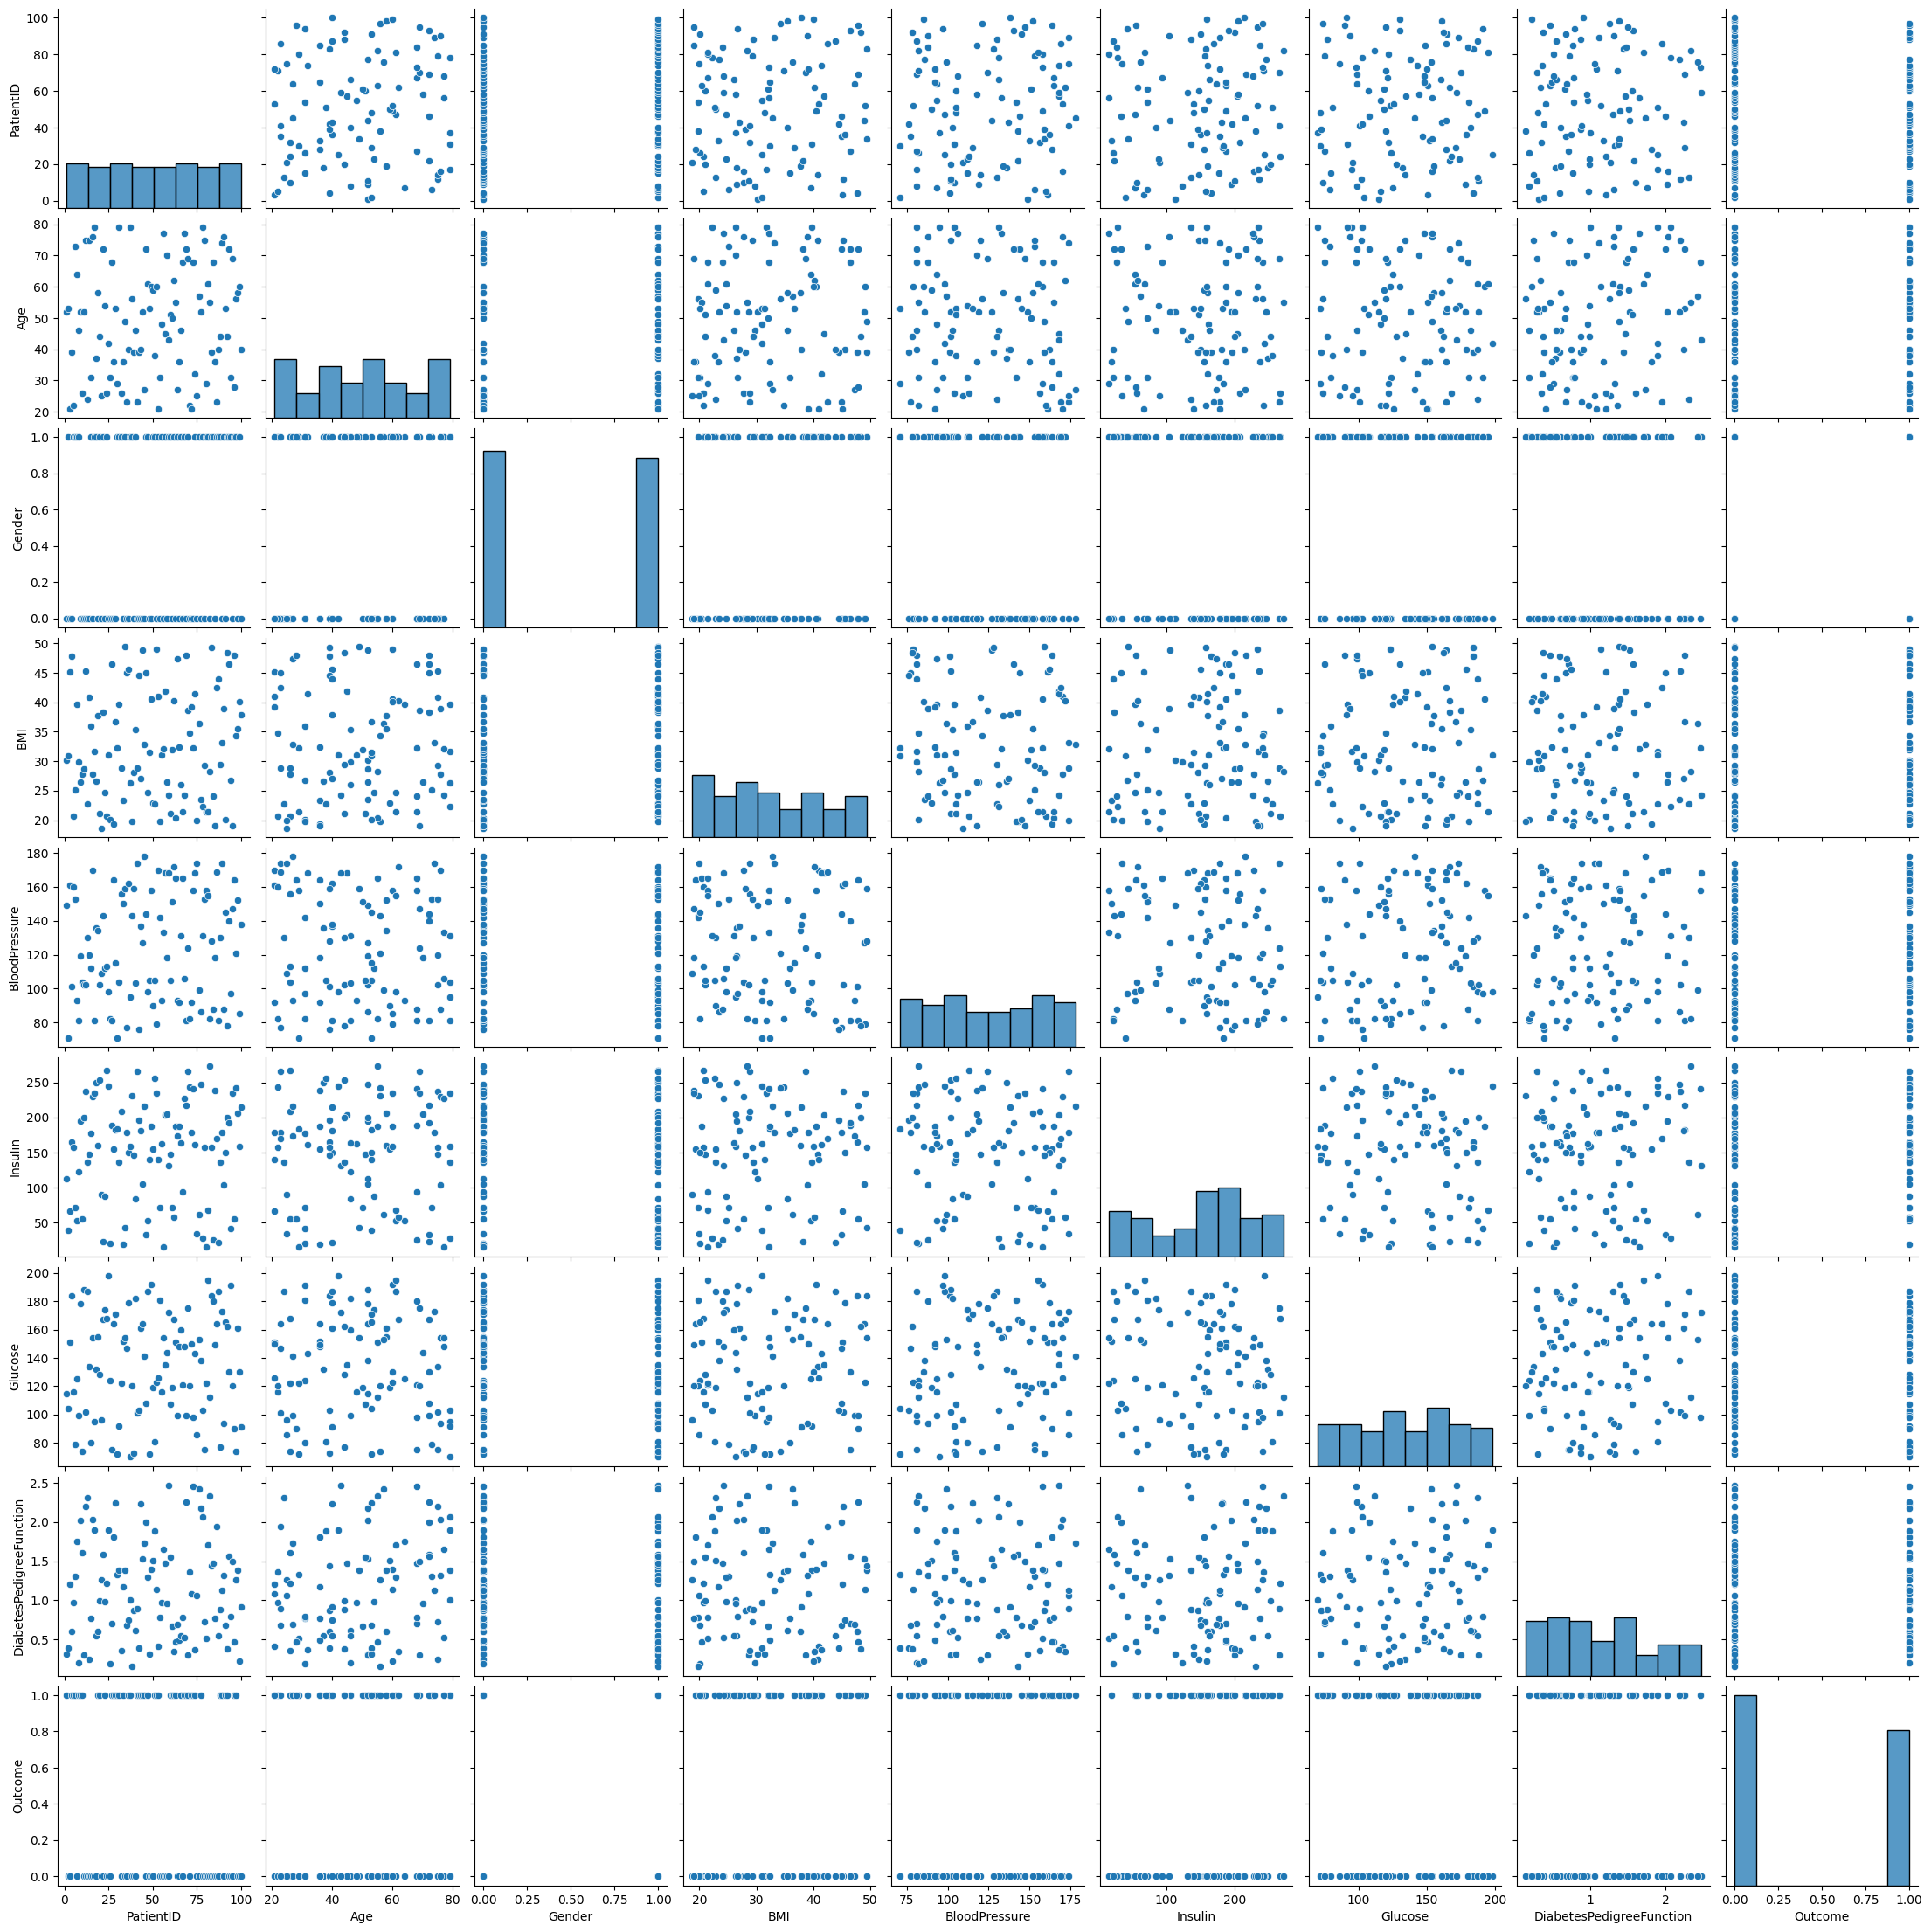

In [8]:
sns.pairplot(data=dataset)
plt.show()

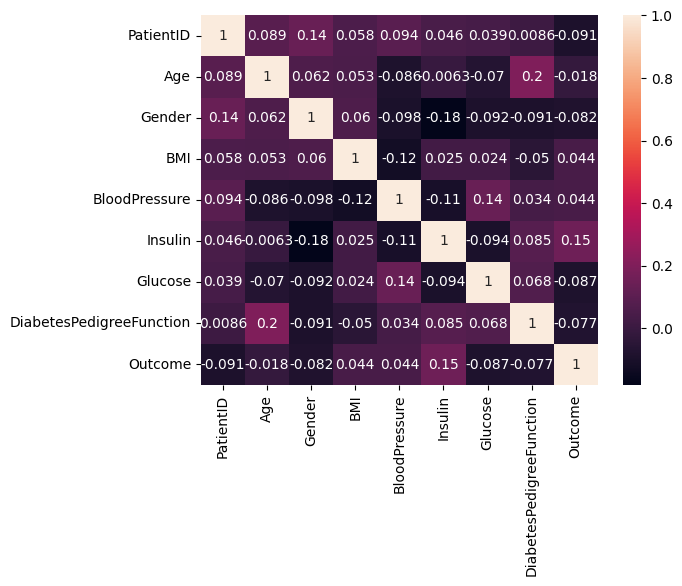

In [9]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [10]:
x = dataset.iloc[:,:-1]
y = dataset["Age"]

In [11]:
dataset.shape

(100, 9)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
lr.score(x_test, y_test)*100

100.0

In [19]:
lr.coef_

array([-1.52315820e-17,  1.00000000e+00, -4.91447161e-15,  3.88578059e-16,
        1.11022302e-16,  0.00000000e+00,  1.66533454e-16, -5.63785130e-16])

In [20]:
lr.intercept_

-1.2789769243681803e-13

In [21]:
x.columns

Index(['PatientID', 'Age', 'Gender', 'BMI', 'BloodPressure', 'Insulin',
       'Glucose', 'DiabetesPedigreeFunction'],
      dtype='str')

In [22]:
lr.predict(x_test)

array([68., 31., 22., 72., 27., 46., 54., 61., 52., 52., 58., 79., 32.,
       49., 53., 22., 52., 79., 24., 26.])

# Polynomial Regression .....

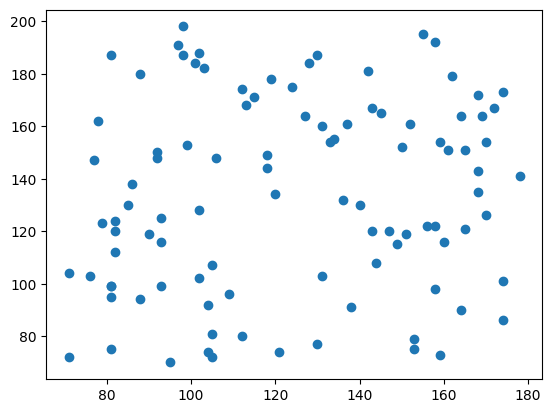

In [26]:
plt.scatter(dataset["BloodPressure"], dataset["Glucose"])
plt.show()

In [25]:
dataset.corr()

,PatientID,Age,Gender,BMI,BloodPressure,Insulin,Glucose,DiabetesPedigreeFunction,Outcome
PatientID,1.000000,0.089138,0.136866,0.058316,0.094479,0.046126,0.038828,0.008574,-0.090873
Age,0.089138,1.000000,0.062033,0.052678,-0.086470,-0.006319,-0.070034,0.200203,-0.018380
Gender,0.136866,0.062033,1.000000,0.060188,-0.098215,-0.181368,-0.092420,-0.090540,-0.082430
BMI,0.058316,0.052678,0.060188,1.000000,-0.124922,0.024644,0.024035,-0.049573,0.044217
BloodPressure,0.094479,-0.086470,-0.098215,-0.124922,1.000000,-0.106475,0.135543,0.034238,0.043858
Insulin,0.046126,-0.006319,-0.181368,0.024644,-0.106475,1.000000,-0.094054,0.085453,0.153579
Glucose,0.038828,-0.070034,-0.092420,0.024035,0.135543,-0.094054,1.000000,0.068096,-0.086867
DiabetesPedigreeFunction,0.008574,0.200203,-0.090540,-0.049573,0.034238,0.085453,0.068096,1.000000,-0.076869
Outcome,-0.090873,-0.018380,-0.082430,0.044217,0.043858,0.153579,-0.086867,-0.076869,1.000000


In [82]:
x = dataset[["Glucose"]]
y = dataset[["BloodPressure"]]

In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
pf  = PolynomialFeatures(degree=6)

In [85]:
pf.fit(x)
pf.transform(x)

array([[1.00000000e+00, 1.15000000e+02, 1.32250000e+04, 1.52087500e+06,
        1.74900625e+08, 2.01135719e+10, 2.31306077e+12],
       [1.00000000e+00, 1.04000000e+02, 1.08160000e+04, 1.12486400e+06,
        1.16985856e+08, 1.21665290e+10, 1.26531902e+12],
       [1.00000000e+00, 1.51000000e+02, 2.28010000e+04, 3.44295100e+06,
        5.19885601e+08, 7.85027258e+10, 1.18539116e+13],
       [1.00000000e+00, 1.84000000e+02, 3.38560000e+04, 6.22950400e+06,
        1.14622874e+09, 2.10906087e+11, 3.88067201e+13],
       [1.00000000e+00, 1.16000000e+02, 1.34560000e+04, 1.56089600e+06,
        1.81063936e+08, 2.10034166e+10, 2.43639632e+12],
       [1.00000000e+00, 7.90000000e+01, 6.24100000e+03, 4.93039000e+05,
        3.89500810e+07, 3.07705640e+09, 2.43087456e+11],
       [1.00000000e+00, 1.25000000e+02, 1.56250000e+04, 1.95312500e+06,
        2.44140625e+08, 3.05175781e+10, 3.81469727e+12],
       [1.00000000e+00, 9.90000000e+01, 9.80100000e+03, 9.70299000e+05,
        9.60596010e+07, 9

In [86]:
x = pf.transform(x)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [91]:
lr.score(x_test,y_test)*100

-24.089943465672413

In [92]:
# Make predictions
y_pred = lr.predict(x)

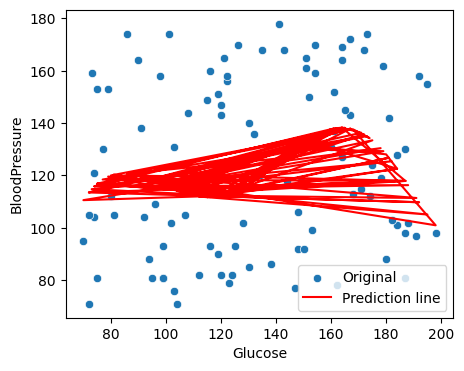

<Figure size 640x480 with 0 Axes>

In [93]:
# Create the plot
plt.figure(figsize=(5,4))
sns.scatterplot(x="Glucose", y="BloodPressure", data=dataset)
plt.plot(dataset["Glucose"], y_pred, c="red")
plt.legend(["Original", "Prediction line"])
plt.show()
plt.savefig("LR Predicted line.jpg")

In [94]:
lr.coef_

array([[ 0.00000000e+00,  9.24855076e-03,  4.57602972e-01,
        -9.61525956e-03,  8.19576031e-05, -3.18774499e-07,
         4.67372443e-10]])

In [95]:
lr.intercept_

array([-321.31069847])